In [5]:
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
from path import Path

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Reading the News API key enviroment variable
abs_path = Path(r'C:/Users/metin/Documents/nufintech/.env')
load_dotenv(abs_path) 
api_key=os.getenv('NEWS_API_KEY')

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
btc_headlines

{'status': 'ok',
 'totalResults': 3452,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'John Biggs',
   'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
   'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
   'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
   'publishedAt': '2020-09-10T14:28:00Z',
   'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'},
  {'source': {'id

In [9]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)
eth_headlines 

{'status': 'ok',
 'totalResults': 1342,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Stan Schroeder',
   'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
   'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
   'url': 'https://mashable.com/article/metamask-ios-android/',
   'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
   'publishedAt': '2020-09-02T16:00:00Z',
   'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension t

In [10]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.160,0.840
1,Image copyrightChandler GuoImage caption\r\n C...,0.2500,0.065,0.000,0.935
2,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.000,1.000
3,A US district judge has sentenced a UK Nationa...,-0.5267,0.000,0.128,0.872
4,"July 15 was, at first, just another day for Pa...",0.0000,0.000,0.000,1.000


In [11]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791
1,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000
2,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000
3,Bitcoin is the monetary base of the Internet. ...,0.5267,0.128,0.0,0.872
4,TLDR: With the training in the Interactive Lea...,0.4019,0.076,0.0,0.924


In [12]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.281175,0.061750,0.014400,0.923850
std,0.368322,0.041842,0.044625,0.043245
min,-0.690800,0.000000,0.000000,0.840000
25%,0.000000,0.000000,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.916250
max,0.507000,0.090000,0.160000,1.000000


In [13]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.250833,0.073611,0.014722,0.911667
std,0.266027,0.071283,0.031212,0.086364
min,0.000000,0.000000,0.000000,0.747000
25%,0.000000,0.000000,0.000000,0.848750
50%,0.226300,0.073000,0.000000,0.917000
75%,0.480725,0.123500,0.000000,1.000000
max,0.750600,0.209000,0.110000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum by a little over .01

Q: Which coin had the highest compound score?

A: Bitcoin 

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [20]:
# Create a new tokens column for bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.160,0.840,"[Two, alleged, crypto, trader, Singapore, appa..."
1,Image copyrightChandler GuoImage caption\r\n C...,0.2500,0.065,0.000,0.935,"[Image, copyrightChandler, GuoImage, caption, ..."
2,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.000,1.000,"[Alexis, Akwagyiram, Tom, Wilson, Monthly, cry..."
3,A US district judge has sentenced a UK Nationa...,-0.5267,0.000,0.128,0.872,"[US, district, judge, sentenced, UK, National,..."
4,"July 15 was, at first, just another day for Pa...",0.0000,0.000,0.000,1.000,"[July, 15, first, another, day, Parag, Agrawal..."


In [21]:
# Create a new tokens column for ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791,"['ve, interacted, cryptocurrencies, past, coup..."
1,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000,"[TL, DR, Complete, Stock, Cryptocurrency, Inve..."
2,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000,"[September, 18, 2020, 6, min, read, Opinions, ..."
3,Bitcoin is the monetary base of the Internet. ...,0.5267,0.128,0.0,0.872,"[Bitcoin, monetary, base, Internet, Unlike, na..."
4,TLDR: With the training in the Interactive Lea...,0.4019,0.076,0.0,0.924,"[TLDR, training, Interactive, Learn, Code, Bun..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Satoshi', 'Nakaboto'), 26),
 (('char', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'Satoshi'), 13),
 (('Nakaboto', 'writes'), 13),
 (('writes', 'Bitcoin'), 13),
 (('every', 'fucking'), 13),
 (('fucking', 'day'), 13),
 (('day', 'Welcome'), 13),
 (('Welcome', 'another'), 13),
 (('another', 'edition'), 13),
 (('edition', 'Bitcoin'), 13),
 (('Bitcoin', 'Today'), 13),
 (('Today', 'Satoshi'), 13),
 (('Nakaboto', 'tell'), 13),
 (('tell', 'whats'), 13),
 (('whats', 'going'), 13),
 (('going', 'Bitcoin'), 13),
 (('Bitcoin', 'BTC'), 11),
 (('BTC', 'every'), 11)]

In [24]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Getty', 'Images'), 3),
 (('char', 'September'), 2),
 (('coronavirus', 'pandemic'), 2),
 (('Chandler', 'Guo'), 2),
 (('one', 'cryptocurrency'), 2),
 (('fiat', 'backed'), 2),
 (('backed', 'stablecoins'), 2),
 (('Satoshi', 'Nakaboto'), 2),
 (('char', 'Ethereum'), 2),
 (('decentralized', 'exchange'), 2),
 (('Images/LightRocket', 'via'), 2),
 (('via', 'Getty'), 2),
 (('price', 'Bitcoin'), 2),
 (("'ve", 'interacted'), 1),
 (('interacted', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'past'), 1),
 (('past', 'couple'), 1),
 (('couple', 'year'), 1),
 (('year', 'good'), 1),
 (('good', 'chance'), 1)]

In [25]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [35]:
# Get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('Bitcoin', 39),
 ('Satoshi', 26),
 ('Nakaboto', 26),
 ('char', 20),
 ('another', 14),
 ('day', 14),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13)]

In [36]:
# Get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 18),
 ('cryptocurrency', 8),
 ('Ethereum', 7),
 ('Bitcoin', 6),
 ('used', 4),
 ('price', 4),
 ('year', 3),
 ('September', 3),
 ('decentralized', 3),
 ('Getty', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [38]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

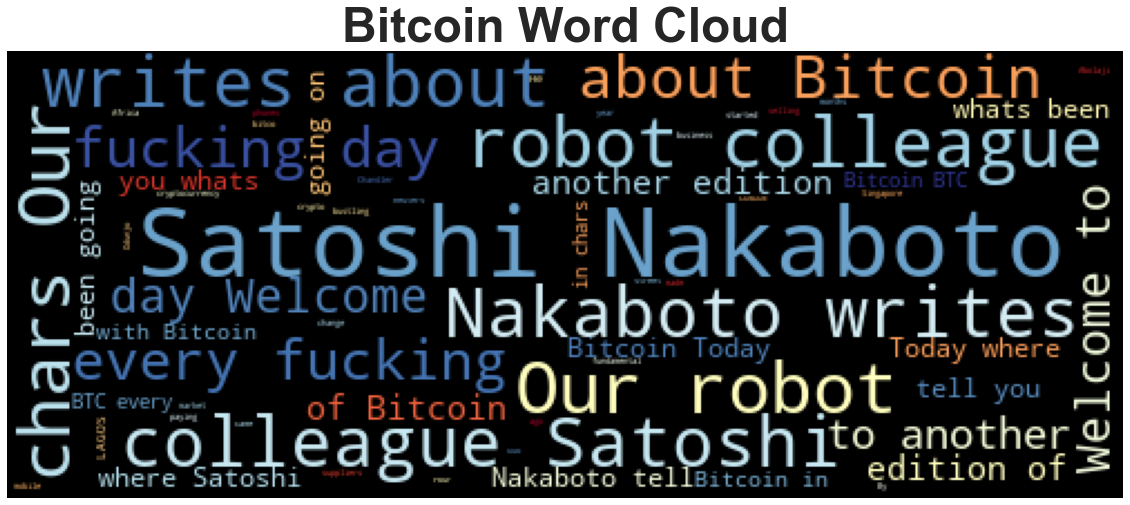

In [39]:
# Generate the Ethereum word cloud
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

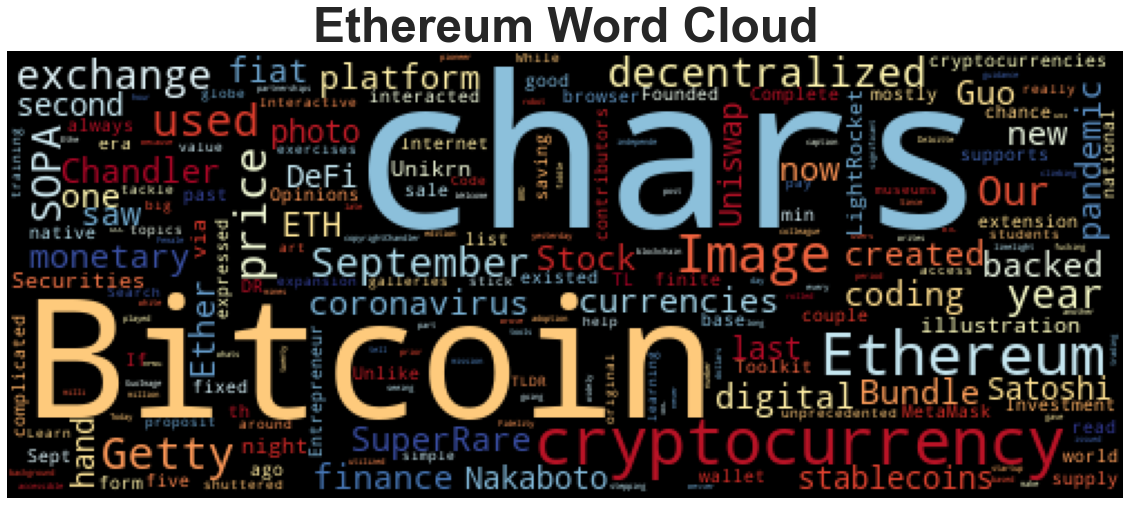

In [40]:
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [42]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [45]:
# Concatenate all of the bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]Image copyrightChandler GuoImage caption\r\n Chandler Guo at one of his cryptocurrency mines\r\nChandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars]By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars]A US district judge has sentenced a UK National to five years in federal prison for participating in the cybercrime activities of hacking collective group “The Dark Overlord.” Nathan Wyatt was extrad… [+961 chars]July 15 was, at first, just another day for Parag Agrawal, the chief technology officer of Twitter. Everything seemed normal on the se

In [46]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [47]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [48]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
US GPE
UK National ORG
five years DATE
The Dark Overlord WORK_OF_ART
Nathan Wyatt PERSON
chars]July 15 CARDINAL
first ORDINAL
Parag Agrawal ORG
Twitter ORG
Travis Scot PERSON
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE

---

## Ethereum NER

In [49]:
# Concatenate all of the bitcoin text together
all_eth_text = eth.text.str.cat()
all_eth_text

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars]September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars]Bitcoin is the monetary base of the Internet. Unlike national currencies, new bitcoins are created by a fixed and finite supply.¹ In an era of unprecedented monetary expansion Bitcoins value proposit… [+6399 chars]TLDR: With the training in the Interactive Learn to Code Bundle, students tackle big coding topics through hands-on exercises to h

In [50]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [51]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [52]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
18, 2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
an era DATE
Bitcoins ORG
SuperRare ORG
SuperRare ORG
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
SEC ORG
OCC ORG
fiat ORG
yesterday DATE
fiat ORG
this year DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
chars]$100 million MONEY
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
September 15, 2020 DATE
the night TIME
USD ORG
the night TIME
Unikrn ORG
Unikrn ORG
UnikoinGold ORG
second ORDINAL
last spring DATE
